In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Dataset Selection

#### Load the Dataset

In [87]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Here, we can see from the dataset that 

- All the features are categorical and
- the values for the features need to be encoded into numeric values for our classifier.

In [88]:
# Checking null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [90]:
#checking the number of unique values
df['class'].unique()

array(['p', 'e'], dtype=object)

Thus we have two claasification. Either the mushroom is poisonous or edible

In [91]:
df.shape

(8124, 23)

# 2. Data Preprocessing and Visualization

## A. Data Preprocessing

#### i. LabelEncode - Encode the features into Numerical data

We will use the LabelEncoder for this specific task which creates ordinal values for all the categorical features. 
While it may not be the best approach but it is really simple

In [92]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Apply the encoder to each of the columns
df = df.apply(encoder.fit_transform)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [93]:
df['stalk-color-above-ring'].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8])

In [94]:
print(df.groupby('class').size())

class
0    4208
1    3916
dtype: int64


As we can see the values for each column are from 0 to the number of categories for that feature. Next, we will define our functions for prior and likelihood to compute the posterior probability and weigh against each of the target variable to see which data point fits where.

In [95]:
# Seperating our target and features
X = df.drop(columns = ['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (5686, 22)
y_train =  (5686,)
X_test =  (2438, 22)
y_test =  (2438,)


In [96]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [97]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

#### ii. corr() -
is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [98]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


## Data Visualization

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'cap-shape'}>,
        <AxesSubplot:title={'center':'cap-surface'}>,
        <AxesSubplot:title={'center':'cap-color'}>,
        <AxesSubplot:title={'center':'bruises'}>],
       [<AxesSubplot:title={'center':'odor'}>,
        <AxesSubplot:title={'center':'gill-attachment'}>,
        <AxesSubplot:title={'center':'gill-spacing'}>,
        <AxesSubplot:title={'center':'gill-size'}>,
        <AxesSubplot:title={'center':'gill-color'}>],
       [<AxesSubplot:title={'center':'stalk-shape'}>,
        <AxesSubplot:title={'center':'stalk-root'}>,
        <AxesSubplot:title={'center':'stalk-surface-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-surface-below-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-above-ring'}>],
       [<AxesSubplot:title={'center':'stalk-color-below-ring'}>,
        <AxesSubplot:title={'center':'veil-type'}>,
        <AxesSubplot:title={'center':'veil-color'}>,


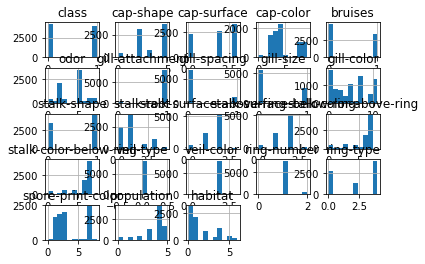

In [99]:
df.hist()

<AxesSubplot:xlabel='class', ylabel='count'>

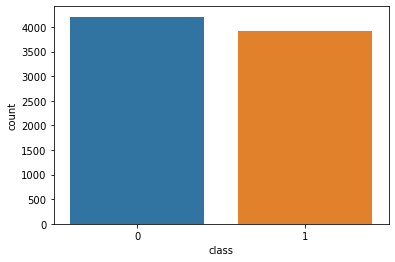

In [100]:
# As there are no null values in data, we can proceed with the next steps.
sns.countplot(df['class'])

<Figure size 1008x432 with 0 Axes>

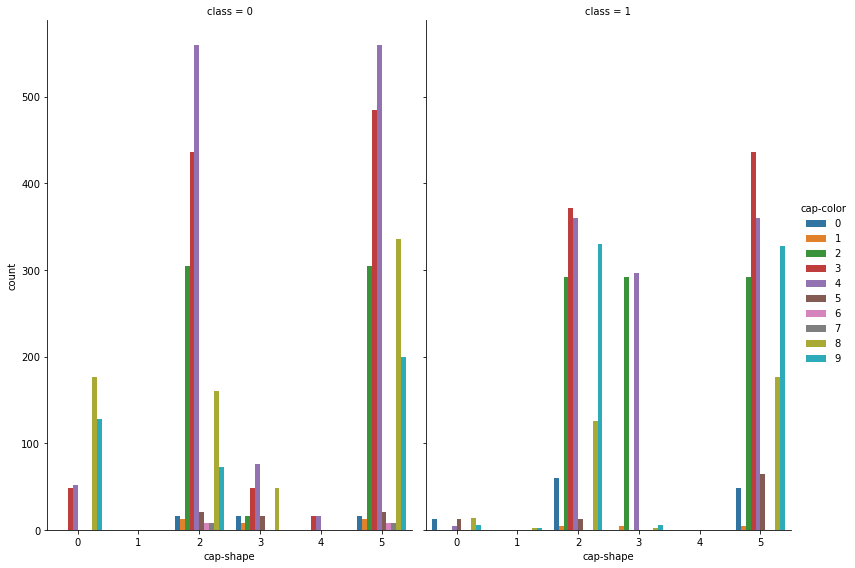

In [101]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count",
                height=8, aspect=.7);

<Figure size 1008x432 with 0 Axes>

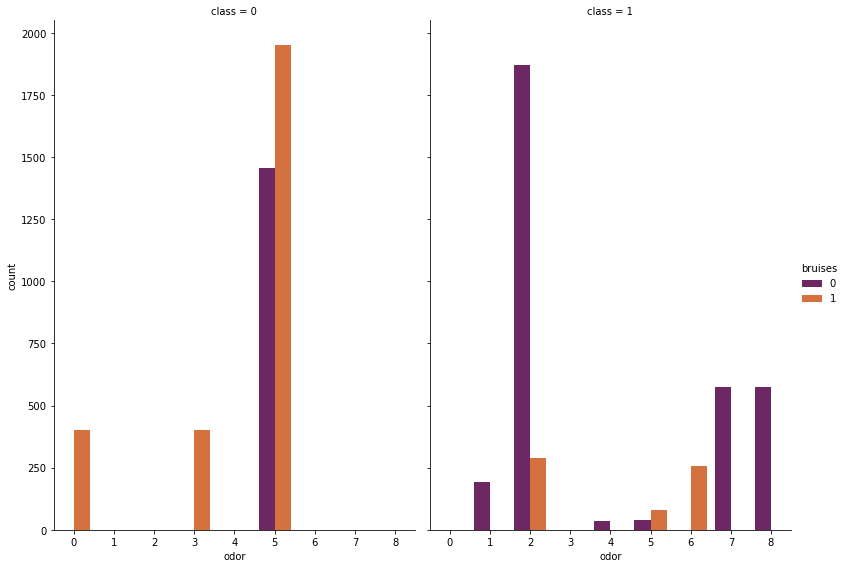

In [102]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                height=8, aspect=.7 , palette = 'inferno');

#### Standardising the data

In [103]:
# Scale the data to be between -1 and 1
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X=scaler.fit_transform(X)
#X

# Data Analysis

#### Naive Bayes Classifier

Finally the time has come when we start building our classifer step-by-step. As we have seen earlier, to classify any data point in the Naive Bayes Classifier, we need the likelihood and prior probability which we will compare and assign the class to the one with higher posterior probability.

In this notebook, we will look at the overview of the Naive Bayes classifier and implement it from scratch and try to fit it on this mushroom classification dataset to predict if a mushroom is poisonous or edible.

The probabilistic model for this classifier looks like:
\begin{equation}
P(C_k | x) = \frac{P(C_k) * P(x | C_k)}{P(x)}
\end{equation}


In plain English, using Bayesian probability terminology, the above equation can be written as
\begin{equation}
posterior = \frac{prior * likelihood}{evidence}
\end{equation}

In [104]:
# First, we calculate the prior probability which is just the percentage of data points belonging to the mentioned class
# For example, if our training dataset has 60% edible mushrooms, then the prior probability will be 0.6 when calculating 
# in the testing side.

def prior(y_train, label):
    
    total_points = y_train.shape[0]
    class_points = np.sum(y_train == label)
    
    return class_points/float(total_points)

In [105]:
## Next, we will define a function to calculate the conditional probability that we will use then to calculate the
## likelihood,

def cond_prob(X_train, y_train, feat_col, feat_val, label):
    """
    In this function, we will calculate the conditional probability which will be used to calculate likelihood.
    The value it returns is of the form 
        P(x_i | y = C)
    which is the probability of the current feature (given by feat_col x_i) having the current value (given by feat_val)
    given that it belongs to the target class C
    
    Effectively, it reduces to the form
        all points belongig to class C which have the given value for the feature column / all points belonging to class C
    """
    
    # Getting all the 
    X_filtered = X_train[y_train == label]
    
    numerator = np.sum(X_filtered[feat_col] == feat_val)
    denominator = np.sum(y_train == label)
    
    return numerator/float(denominator)

In [106]:
## Now time to calculate the posterior probability and make predictions

def predict(X_train, y_train, xtest):
    
    # Get the number of target classes
    classes = np.unique(y_train)
    
    # All the features for our dataset
    features = [x for x in X_train.columns]
    
    
    # Compute posterior probabilites for each class
    post_probs = []
    
    for label in classes:
        
        # Since, posterior = prior * likelihood
        # We'll calculate likelihood by calculating the product of the conditional probabilities for each of the features
        
        likelihood = 1.0
        
        for f in features:
            cond = cond_prob(X_train, y_train, f, xtest[f], label)
            likelihood *= cond
        
        prior_prob = prior(y_train, label)
        
        posterior = prior_prob * likelihood
        
        post_probs.append(posterior)
        
    # Return the label for which the posterior probability was the maximum
    prediction = np.argmax(post_probs)
    
    return prediction  

### Time to test our classifer

In [107]:
# First, let's check on a random example

rand_example = 6

output = predict(X_train, y_train, X_test.iloc[rand_example])

print("Naive Bayes Classifier predicts ", output)
print("Current Answer ", y_test.iloc[rand_example])

Naive Bayes Classifier predicts  1
Current Answer  1


In [108]:
## Now, we'll check the results on each of the test data point and calculate 
## an accuracy-based score for our classifier

def accuracy_score(X_train, y_train, xtest, ytest):
    
    preds = []
    
    for i in range(xtest.shape[0]):
        pred_label = predict(X_train, y_train, xtest.iloc[i])
        preds.append(pred_label)
        
    preds = np.array(preds)
    
    accuracy = np.sum(preds == ytest)/ytest.shape[0]
    
    return accuracy

In [ ]:
print("Accuracy Score for our classifier == ", accuracy_score(X_train, y_train, X_test, y_test))